# Test Env

Import data.

In [1]:
%load_ext autoreload
%autoreload 2

import dgym as dg

# load all data
print('load data')
path = '../dgym-data'

deck = dg.MoleculeCollection.from_sdf(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

load data


In [2]:
building_blocks = dg.datasets.enamine(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/out/Enamine_Building_Blocks_Stock_262336cmpd_20230630.fpb')

# align fingerprints to building blocks
print('align fingerprints')
fingerprints = dg.utils.sort_fingerprints(fingerprints, building_blocks)

# partition building blocks according to functional groups
print('partition building blocks')
templates = dg.utils.get_unique_reactants(reactions)
building_blocks = dg.utils.partition_building_blocks(building_blocks, templates, out_dir=path)

align fingerprints
partition building blocks


In [3]:
from dgym.envs.library_designer import LibraryDesigner

library_designer = LibraryDesigner(
    reactions,
    building_blocks,
    fingerprints
)

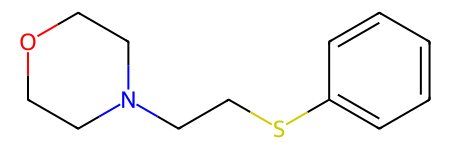

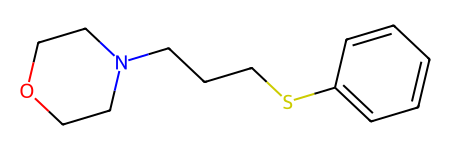

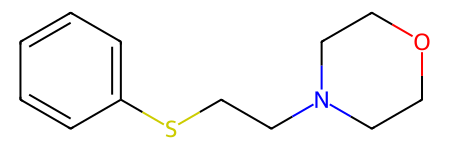

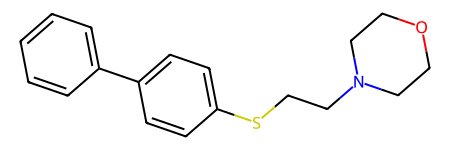

[None, None, None, None]

In [4]:
from dgym.envs import DrugEnv

drug_env = DrugEnv(library_designer, library=list(deck[:6]))
# is there data associated with the library? could be.

action = {
    'design': {
        'selected_molecules': [0],
        'num_analogs': 2,
        'percent_random': 0.0
        # fraction_random
    }
}

drug_env.step(action)
[display(p) for p in drug_env.library[6:]]

In [36]:
building_blocks.keys()

dict_keys(['aldehyde_robust', 'aryl_aldehyde_robust', 'aldehyde_or_ketone_robust', 'aldehyde_or_ketone_restricted_robust', 'aldehyde_or_ketone_flexible_robust', 'Thiol_1R_clickchem', 'Alkene_clickchem', 'Ester_clickchem', 'carboxylic_acid_or_ester_robust', 'carboxylic_acid_or_extended_esters_robust', 'Amine_2R_clickchem', 'Halide_clickchem', 'aryl_halide_type_1_robust', 'halide_type_3_robust', 'halide_type_2_robust', 'aryl_halide_type_2_robust', 'halide_type_1_robust', 'aryl_halide_nitrogen_optional_robust', 'aryl_halide_flexible_robust', 'Alcohol_clickchem', 'alkyl_halogen_or_alcohol_robust', 'alcohol_robust', 'primary_or_secondary_alcohol_robust', 'primary_or_secondary_amine_C_aryl_alkyl_robust', 'alkyl_halogen_robust', 'alkyl_halide_robust', 'primary_or_secondary_halide_robust', 'Carboxylate_clickchem', 'carboxylic_acid_robust', 'Primary_Amine_1R_clickchem', 'thioamide_robust', 'nitrile_type_1_robust', 'nitrile_type_2_robust', 'pyridine_pyrimidine_triazine_robust', 'aryl_or_vinyl_ha

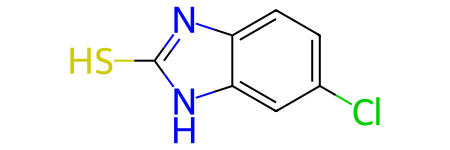

In [41]:
building_blocks['5_mem_aryl_w_NH_max2N_robust']['rdMol'][0]

In [51]:
d = deck[0]

d.metadata['m'] = 4

In [52]:
deck[0].metadata

{'m': 4}

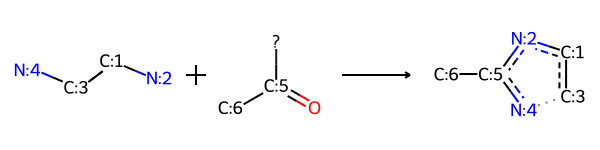

In [26]:
reactions[37]

In [32]:
from dgym.agents import DrugAgent

In [33]:
drug_agent = DrugAgent(drug_env.action_space)

In [179]:
drug_agent.act()

TypeError: DrugAgent.act() missing 2 required positional arguments: 'observations' and 'mask'